#Linear Regression
Linear Regression is a supervised learning algorithm used to predict a **continuous target variable** from one or more **features/input variables**.
The variable that is to be predicted is dependent on the feature or input(independant variable).

Linear Regression can be further classified into two types – Simple Linear Regression (1 feature) and Multiple Linear Regression (multiple features).

Predictions are made with the help of best fit line:

**Best Fit Line:**
A straight line that best represents the relationship between the independent variable(s) and the dependent variable, minimizing the difference between actual and predicted values.

**Cost Function:**
A mathematical function that measures the error between the predicted values and the actual values. Minimizing the cost function ensures the model’s predictions are as close as possible to the actual values.

##Importing Libraries
• Numpy – It provides a fast numerical array structure and operating functions.

• pandas – It provides tools for data storage, manipulation and analysis tasks.

• Scikit-Learn – The required machine learning library in Python.

• Matplotlib – It is the basic plotting library in Python. It provides tools for making plots.

• Seaborn - Used for advanced and attractive statistical data visualization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Uploading and loading the dataset

In [2]:
from google.colab import files

uploaded = files.upload()  # This will open a file upload dialog


In [3]:
df = pd.read_csv('Student_Performance.csv') #reading the CSV file into pandas dataframe

#Exploratory Data Analysis

In [4]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
df.describe(include="all") #incldues categorical values too (object)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,No,NaN,NaN,NaN
freq,NaN,NaN,5052,NaN,NaN,NaN
mean,4.992900,69.445700,NaN,6.530600,4.583300,55.224800
std,2.589309,17.343152,NaN,1.695863,2.867348,19.212558
min,1.000000,40.000000,NaN,4.000000,0.000000,10.000000
25%,3.000000,54.000000,NaN,5.000000,2.000000,40.000000
50%,5.000000,69.000000,NaN,7.000000,5.000000,55.000000
75%,7.000000,85.000000,NaN,8.000000,7.000000,71.000000


Encoding Object Variable To Numerical Variable

In [7]:
print(df['Extracurricular Activities'].unique())

['Yes' 'No']


In [8]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
print(df['Extracurricular Activities'].unique())

[1 0]


In [10]:
df.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


Now we've converted the Extracurricular Activities into binary format

Check for missing values

In [11]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


Here we have no missing values but if we had any we would've replaced it with mean/median/mode values

In [12]:
df.describe() #now we have all numeric values

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


###Check for duplicates

In [14]:
dups= df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups] to see the duplicated rows

Number of duplicate rows = 127


In [15]:
print('Before', df.shape)
df.drop_duplicates(inplace = True)
print('After', df.shape)

Before (10000, 6)
After (9873, 6)


In [16]:
dups=df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


##Correlation Plot

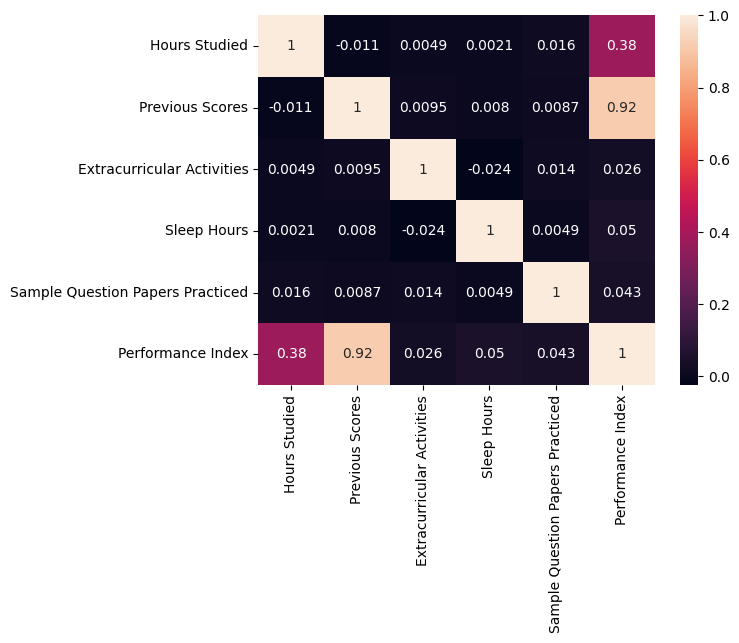

In [18]:
sns.heatmap(df.iloc[:, 0:6].corr(), annot=True)
plt.show() #here negative correlation shows inverse relationship i.e. if one value increases the other decreases

##Outlier check

/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/boxplot.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/boxplot.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/boxplot.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/boxplot.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels, **kwargs)


<Figure size 1000x1000 with 0 Axes>

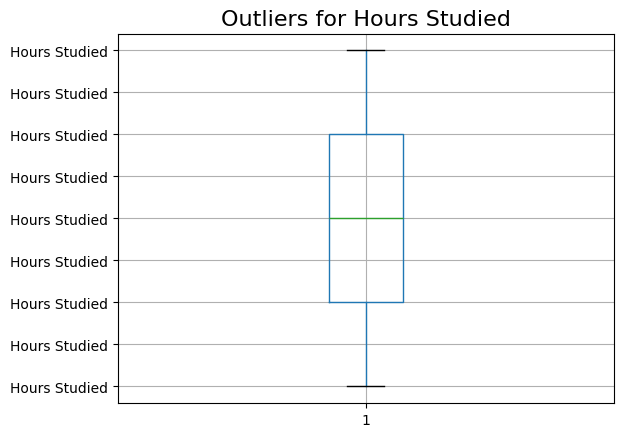

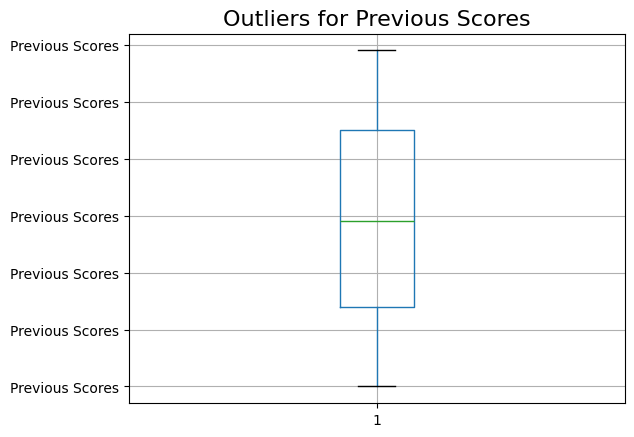

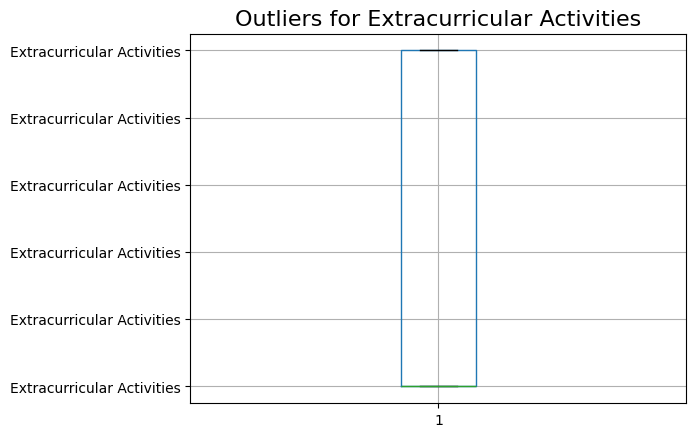

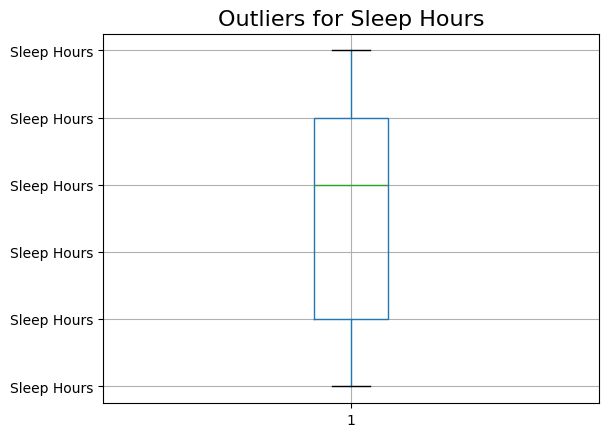

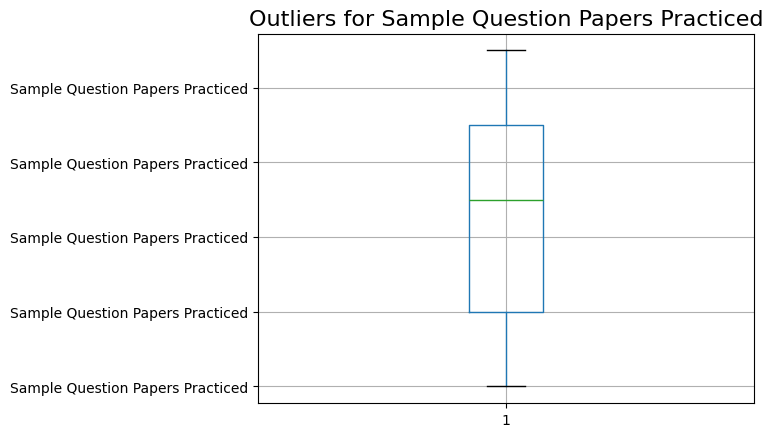

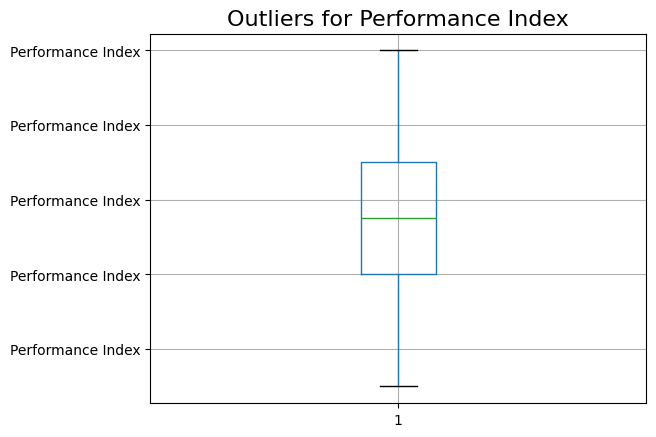

In [29]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
# df[cont].boxplot(vert=0)
for col in cont:
    plt.figure()
    df.boxplot(column=col, vert=0)
    plt.title(f'Outliers for {col}', fontsize=16)
plt.show()

Clearly no outliers present.

##Data Distribution

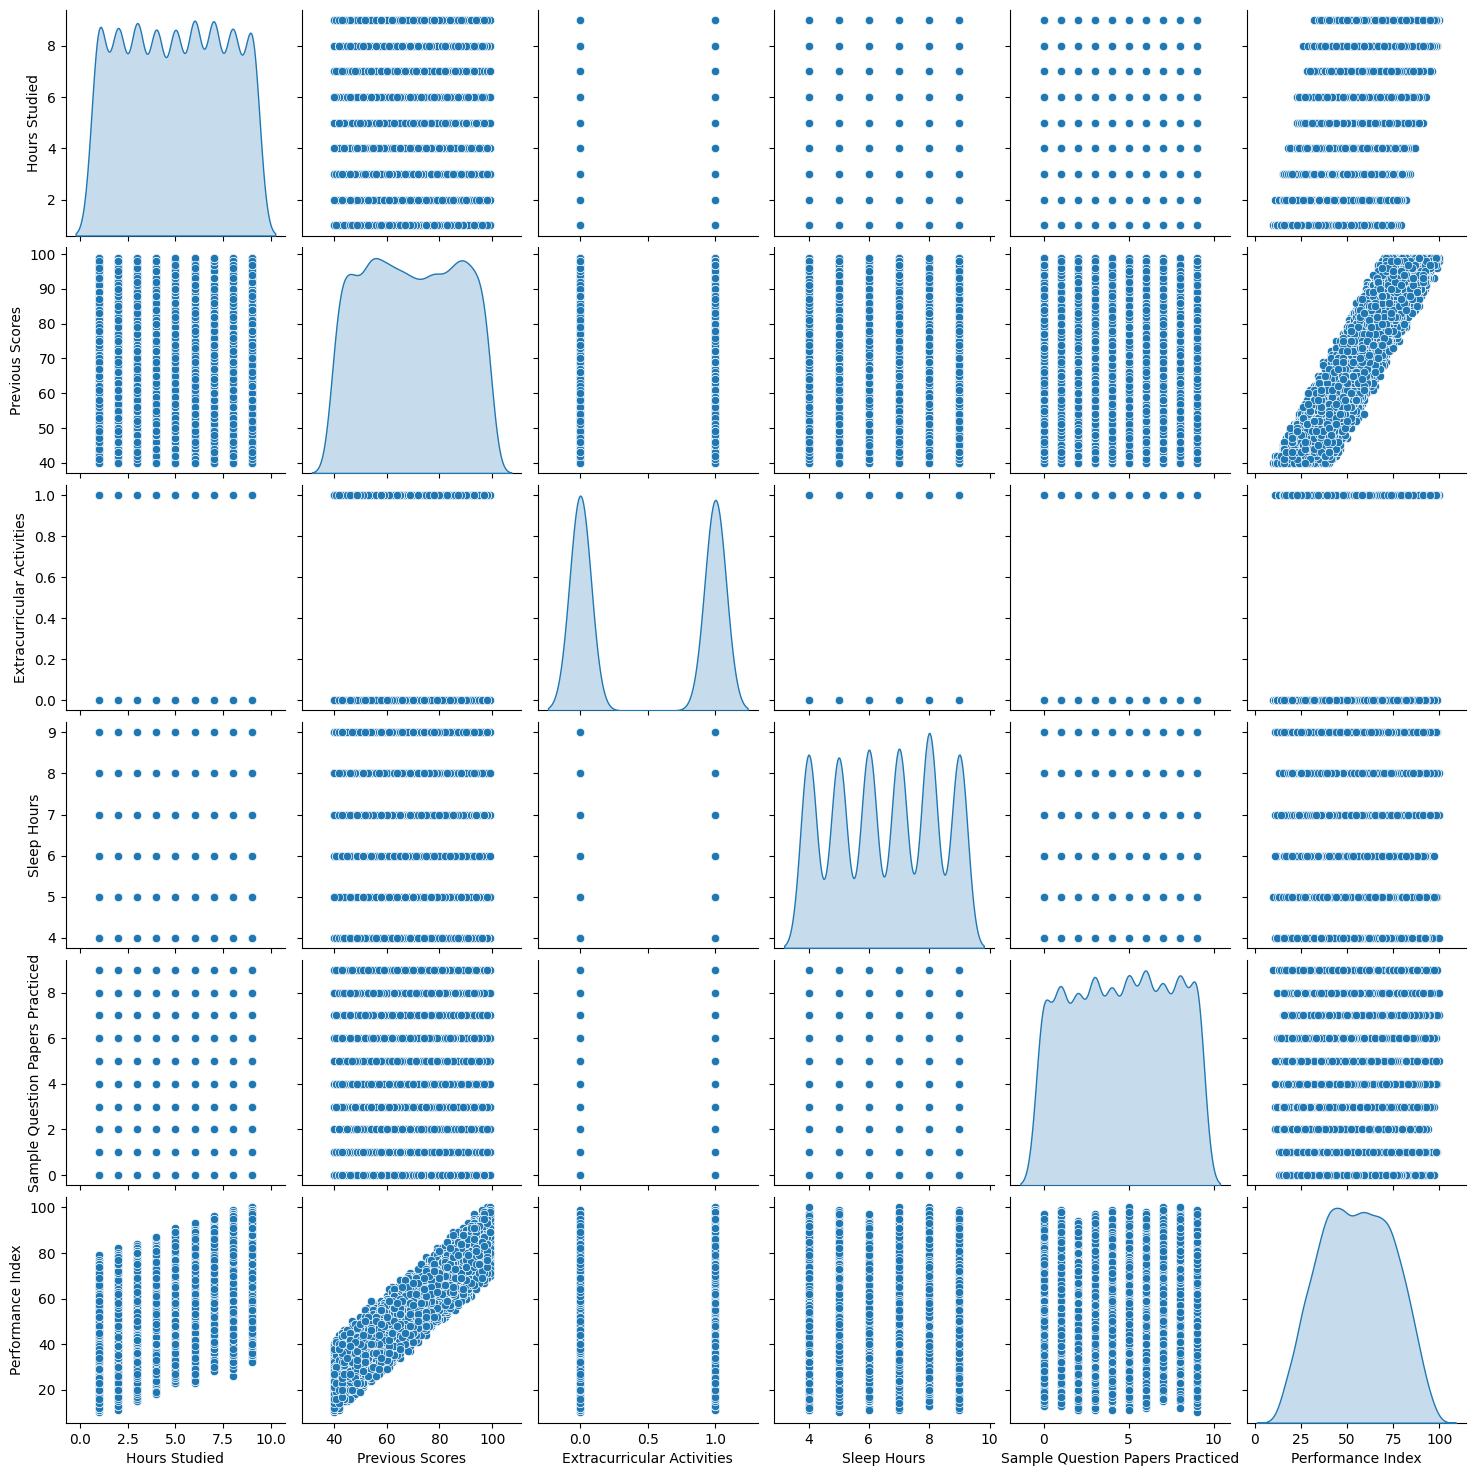

In [30]:
df_attr=(df[cont])
sns.pairplot(df_attr, diag_kind='kde')
plt.show()

##Test Train Split

In [32]:
# Define features (X) and target (y)
X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
        'Sleep Hours', 'Sample Question Papers Practiced']]
y = df['Performance Index']

In [33]:
from sklearn.model_selection import train_test_split
#Split X and y into training and Test set in 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) #Setting random_state ensures that the same random numbers are generated every time, so you get the same results each time you run your code.


#Linear Regression Model

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [48]:
# Predict on training and testing data
y_train_pred = regression_model.predict(X_train)
y_test_pred = regression_model.predict(X_test)

# Display first few predictions vs actuals
print("---- Sample Predictions (Train) ----")
train_results = pd.DataFrame({
    'Actual': y_train.values[:5],
    'Predicted': y_train_pred[:5]
})
print(train_results)

print("\n---- Sample Predictions (Test) ----")
test_results = pd.DataFrame({
    'Actual': y_test.values[:5],
    'Predicted': y_test_pred[:5]
})
print(test_results)


---- Sample Predictions (Train) ----
   Actual  Predicted
0    69.0  68.688928
1    42.0  42.080309
2    42.0  41.926026
3    64.0  65.090659
4    26.0  27.174140

---- Sample Predictions (Test) ----
   Actual  Predicted
0    47.0  46.476744
1    76.0  80.274526
2    62.0  61.057604
3    23.0  22.708336
4    76.0  74.839441


In [36]:
#Coefficients for each of the independant attributes
for idx, col_name in enumerate(X_train.columns):
  print("the coefficient of {} is {}".format(col_name, regression_model.coef_[idx]))
#shows how each feature affects the target variable

the coefficient of Hours Studied is 2.8536431789964953
the coefficient of Previous Scores is 1.0180198793903572
the coefficient of Extracurricular Activities is 0.5779771696711128
the coefficient of Sleep Hours is 0.47152970065105687
the coefficient of Sample Question Papers Practiced is 0.19003357535436283


In [38]:
#intercept
intercept = regression_model.intercept_
print ("The intercept for our model is {}".format(intercept))

The intercept for our model is -33.97689483351816


If a student had 0 hours studied, 0 previous scores, 0 sleep hours, practiced 0 sample papers, and did not participate in extracurricular activities, the model predicts their Performance Index to be approximately -33.98.

The R² score (coefficient of determination) measures how well your model explains the variance in the target variable.

In [39]:
# R square on training data
regression_model.score(X_train, y_train)

0.9887979467634684

In [40]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9883149212472456

The RMSE (Root Mean Squared Error) measures the average difference between the predicted values and the actual values in the same units as the target variable.

In [41]:
# RMSE on training data
predicted_train = regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train, predicted_train))

np.float64(2.0322742798043816)

In [42]:
# RMSE on testing data
predicted_test = regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, predicted_test))

np.float64(2.0777632017683256)

##Prediction for a new student

In [50]:
new_student = pd.DataFrame({
    'Hours Studied': [10],
    'Previous Scores': [80],
    'Extracurricular Activities': [1],  # 1 = Yes
    'Sleep Hours': [7],
    'Sample Question Papers Practiced': [5]
})

predicted_performance = regression_model.predict(new_student)
print(f"\nPredicted Performance Index for the new student: {predicted_performance[0]:.2f}")



Predicted Performance Index for the new student: 80.83


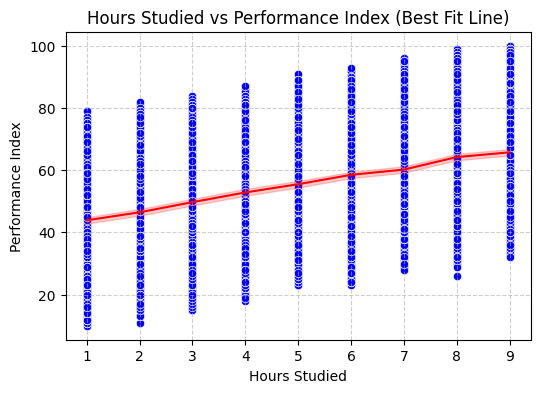

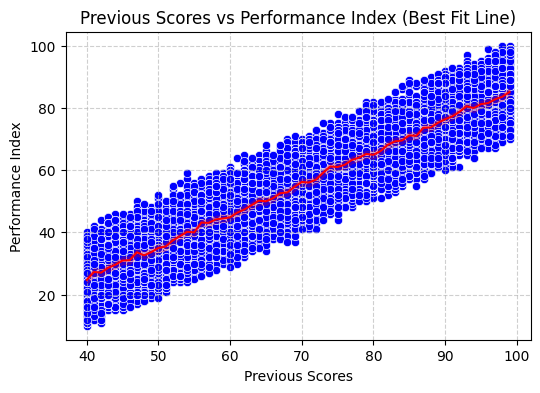

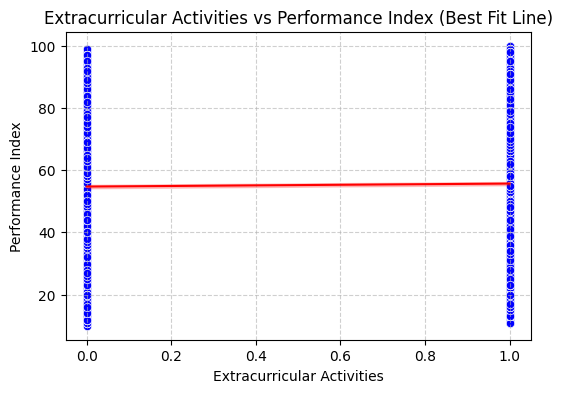

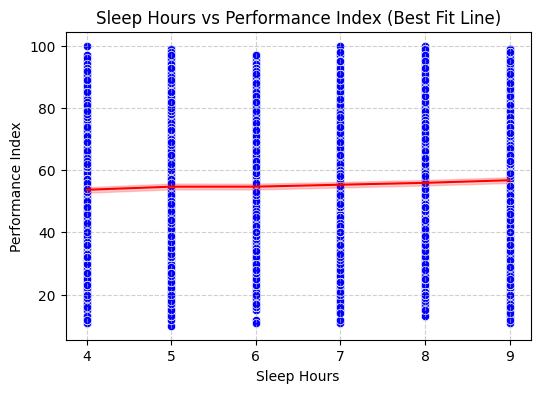

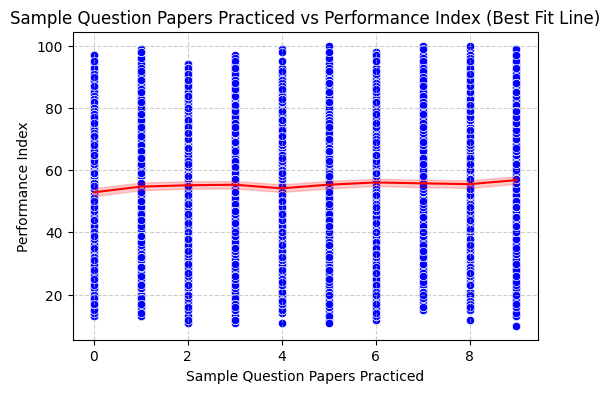

In [52]:
features = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
            'Sleep Hours', 'Sample Question Papers Practiced']

for feature in features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[feature], y=df['Performance Index'], color='blue')
    sns.lineplot(x=df[feature], y=regression_model.predict(X), color='red')
    plt.title(f"{feature} vs Performance Index (Best Fit Line)")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
